# Capstone #2: Modeling

The notebook shows the design abd comparison of various models to predict tht elength of the ICU stay from the `LengthOfStay.csv` data set.  This data set has already been cleaned, scaled and split in previous notebooks.

If necessary, remove the line comment delineater to install the following libraries.

In [88]:
# %pip install --upgrade xgboost
# %pip install lightgbm
# %pip install catboost

Import the following libraries.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.inspection import permutation_importance
from sb_utils import save_file

Read the split data sets into the appropriate variables.

In [90]:
X_train = pd.read_csv('LengthOfStay_Xtrain.csv')
X_test = pd.read_csv('LengthOfStay_Xtest.csv')
y_train = pd.read_csv('LengthOfStay_ytrain.csv')
y_test = pd.read_csv('LengthOfStay_ytest.csv')
X_train.head()

dialysisrenalendstage  asthma  irondef  pneum  substancedependence  \
0                      0       0        0      0                    0   
1                      0       0        0      0                    0   
2                      1       0        1      0                    0   
3                      0       0        0      0                    0   
4                      0       0        0      0                    0   

   psychologicaldisordermajor  depress  psychother  fibrosisandother  \
0                           0        0           0                 0   
1                           0        0           0                 0   
2                           1        0           0                 0   
3                           0        0           0                 0   
4                           0        0           0                 0   

   malnutrition  ...  neutrophils    sodium   glucose  bloodureanitro  \
0             0  ...    -0.388013  1.972879  1.071466        1.639717   
1             0  ...     0.284490 -0.102962 -0.593133       -0.187704   
2             0  ...    -1.209962 -0.707863  1.307013        1.591627   
3             0  ...    -0.145165  0.631417 -0.456319       -0.187704   
4             0  ...     1.834983  1.397983 -0.275216       -0.187704   

   creatinine       bmi     pulse  respiration  readmission_int  total_issues  
0   -0.409788  0.081591 -0.982775     0.010962        -0.724748     -0.677395  
1   -0.263720  0.071832  0.391208     0.010962         1.867584     -0.677395  
2    0.776118 -0.626783  0.305334    -1.572460        -0.076665      2.969893  
3   -0.595490  0.374475 -0.381657     0.010962        -0.076665     -0.677395  
4    0.171147 -1.632482  0.219460     0.010962        -0.724748     -0.677395  

[5 rows x 37 columns]

## Screening Models

In the first stage, I'll test the following regression models with default hyperparameters to determine which model gives the best starting point.  The models will be evaluated using the Mean Absolute Error (MAE) and R-squared metrics.

1. Linear Regression
2. Support Vector Machine (SVM)
3. Random Forest Regressor
4. Gradient Boot Regressor

### 1. Linear Regression

In [91]:
y_train = y_train.values.ravel()

In [92]:
#Run default linear regression on dataset
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.7629027814305008

In [93]:
#Determine MAE with test data
y_pred_LR = np.array(LR.predict(X_test))
mae_LR = mean_absolute_error(y_test, y_pred_LR)
print(f'Linear Regression MAE: {mae_LR}')

Linear Regression MAE: 0.877404663256595


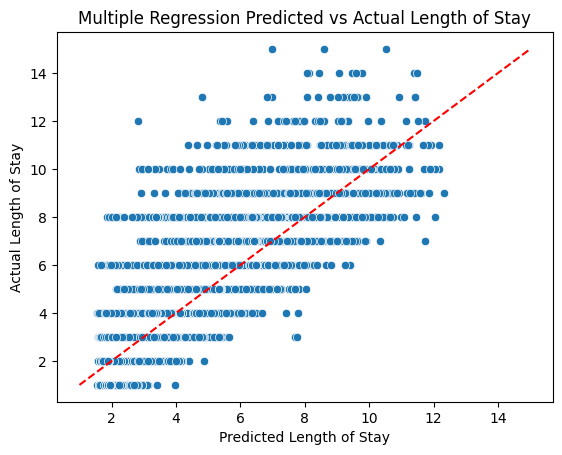

In [94]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_LR, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Multiple Regression Predicted vs Actual Length of Stay')
plt.show()

### 2. Support Vector Machine (SVM)

In [95]:
#Run default SVM on dataset
SR = LinearSVR(max_iter=10000)
SR.fit(X_train, y_train)
SR.score(X_train, y_train)

0.7503804415760079

In [96]:
#Determine MAE with test data
y_pred_SR = np.array(SR.predict(X_test))
mae_SR = mean_absolute_error(y_test, y_pred_SR)
print(f'SVM MAE: {mae_SR}')

SVM MAE: 0.8537640631137697


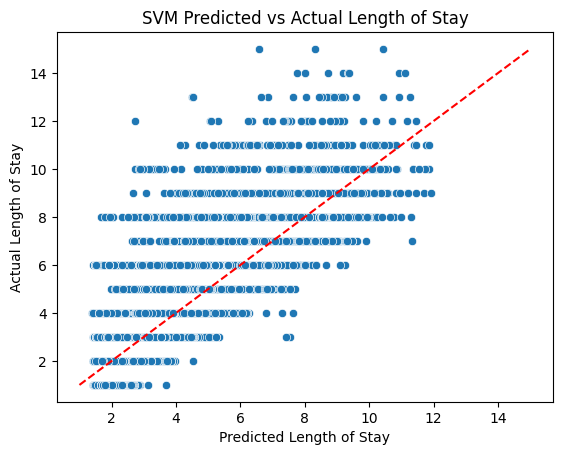

In [97]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_SR, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('SVM Predicted vs Actual Length of Stay')
plt.show()

### 3. Random Forest Regressor

In [98]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF.score(X_train, y_train)

0.9914388695490483

In [99]:
#Determine MAE with test data
y_pred_RF = np.array(RF.predict(X_test))
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print(f'Random Forest MAE: {mae_RF}')

Random Forest MAE: 0.33353767356248243


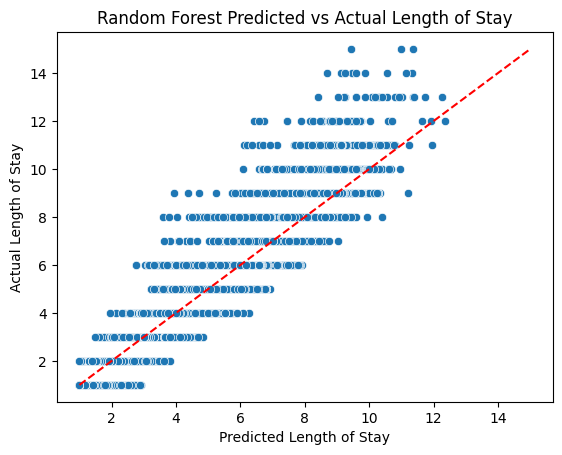

In [100]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_RF, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Random Forest Predicted vs Actual Length of Stay')
plt.show()

### 4. Gradient Boost Regressor

Here we will compare multple types of Gradient Boost algorithms:
- GradientBoostRegressor
- XGBoost
- LiteGBM
- CatBoost

In [101]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
GB.score(X_train, y_train)

0.9586471791121709

In [102]:
#Determine MAE with test data
y_pred_GB = np.array(GB.predict(X_test))
mae_GB = mean_absolute_error(y_test, y_pred_GB)
print(f'Gradient Boost Regressor MAE: {mae_GB}')

Gradient Boost Regressor MAE: 0.3701882884930498


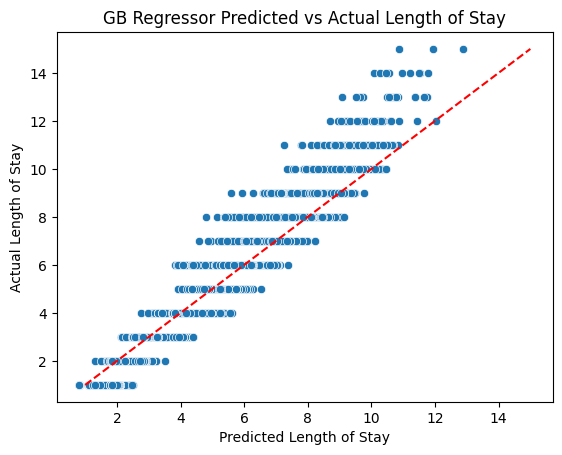

In [103]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_GB, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('GB Regressor Predicted vs Actual Length of Stay')
plt.show()

In [104]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
XG.score(X_train, y_train)

0.9791420102119446

In [105]:
#Determine MAE with test data
y_pred_XG = np.array(XG.predict(X_test))
mae_XG = mean_absolute_error(y_test, y_pred_XG)
print(f'Gradient Boost Regressor MAE: {mae_XG}')

Gradient Boost Regressor MAE: 0.3063763678073883


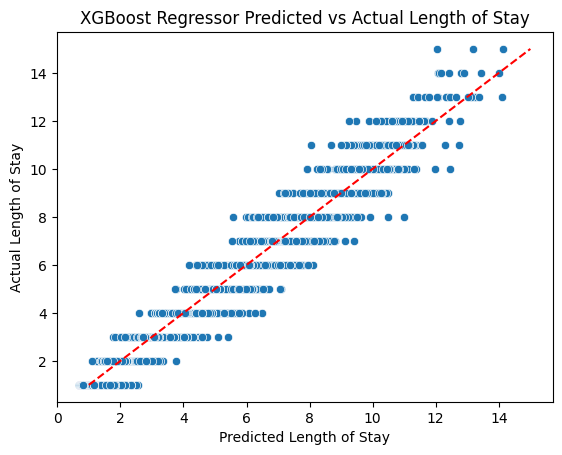

In [106]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_XG, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('XGBoost Regressor Predicted vs Actual Length of Stay')
plt.show()

In [107]:
LG = LGBMRegressor()
LG.fit(X_train, y_train)
LG.score(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1954
[LightGBM] [Info] Number of data points in the train set: 74971, number of used features: 37
[LightGBM] [Info] Start training from score 3.998293


0.971669042617815

In [108]:
#Determine MAE with test data
y_pred_LG = np.array(LG.predict(X_test))
mae_LG = mean_absolute_error(y_test, y_pred_LG)
print(f'Gradient Boost Regressor MAE: {mae_LG}')

Gradient Boost Regressor MAE: 0.3087125226497304


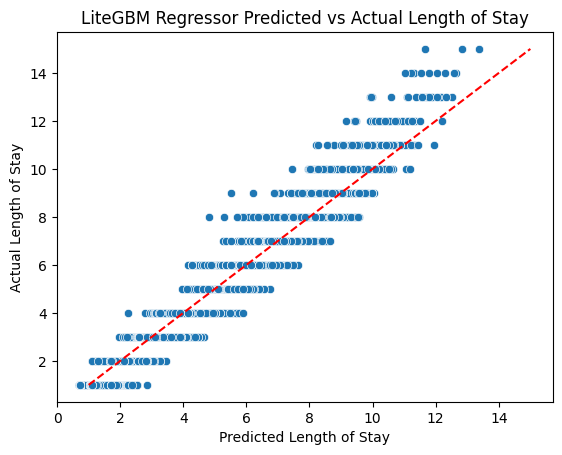

In [109]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_LG, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('LiteGBM Regressor Predicted vs Actual Length of Stay')
plt.show()

In [110]:
CB = CatBoostRegressor()
CB.fit(X_train, y_train)
CB.score(X_train, y_train)

Learning rate set to 0.080987
0:	learn: 2.2140718	total: 33.5ms	remaining: 33.5s
1:	learn: 2.0813240	total: 65.3ms	remaining: 32.6s
2:	learn: 1.9590964	total: 92ms	remaining: 30.6s
3:	learn: 1.8477255	total: 112ms	remaining: 28s
4:	learn: 1.7494637	total: 134ms	remaining: 26.7s
5:	learn: 1.6629058	total: 162ms	remaining: 26.8s
6:	learn: 1.5808627	total: 180ms	remaining: 25.5s
7:	learn: 1.5097780	total: 199ms	remaining: 24.7s
8:	learn: 1.4437544	total: 221ms	remaining: 24.3s
9:	learn: 1.3852867	total: 245ms	remaining: 24.2s
10:	learn: 1.3295715	total: 283ms	remaining: 25.4s
11:	learn: 1.2807707	total: 344ms	remaining: 28.3s
12:	learn: 1.2363664	total: 377ms	remaining: 28.7s
13:	learn: 1.1951676	total: 397ms	remaining: 28s
14:	learn: 1.1580464	total: 418ms	remaining: 27.4s
15:	learn: 1.1247825	total: 436ms	remaining: 26.8s
16:	learn: 1.0935113	total: 455ms	remaining: 26.3s
17:	learn: 1.0648443	total: 479ms	remaining: 26.1s
18:	learn: 1.0390464	total: 507ms	remaining: 26.2s
19:	learn: 1.0

np.float64(0.9794979647483631)

In [111]:
#Determine MAE with test data
y_pred_CB = np.array(CB.predict(X_test))
mae_CB = mean_absolute_error(y_test, y_pred_CB)
print(f'CatBoost Regressor MAE: {mae_CB}')

CatBoost Regressor MAE: 0.2798977484889579


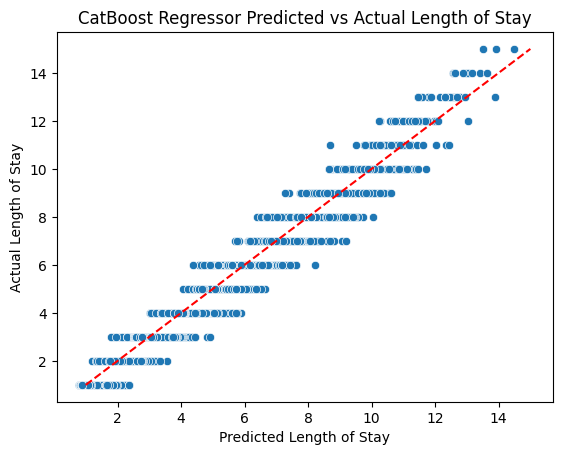

In [112]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CB, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Regressor Predicted vs Actual Length of Stay')
plt.show()

### Summary of Model Screening 

In [114]:
MAE_dict = {'Multiple Linear Regression': mae_LR, 'SVM Regressor': mae_SR, 'Random Forest Regressor': mae_RF, 
            'Gradient Boost Regressor': mae_GB, 'XGBoost Regressor': mae_XG, 'LiteGBM Regressor': mae_LG, 'CatBoost Regressor': mae_CB}
Rsquared_dict = {'Multiple Linear Regression': LR.score(X_train, y_train), 'SVM Regressor': SR.score(X_train, y_train), 
                 'Random Forest Regressor': RF.score(X_train, y_train), 'Gradient Boost Regressor': GB.score(X_train, y_train), 
                 'XGBoost Regressor': XG.score(X_train, y_train), 'LiteGBM Regressor': LG.score(X_train, y_train), 'CatBoost Regressor': CB.score(X_train, y_train)}
Comment_dict = {'Multiple Linear Regression': 'No', 'SVM Regressor': 'No', 'Random Forest Regressor': 'No', 
            'Gradient Boost Regressor': 'No', 'XGBoost Regressor': 'Yes', 'LiteGBM Regressor': 'Yes', 'CatBoost Regressor': 'Yes'}
summary = pd.DataFrame({'MAE': MAE_dict, 'R²': Rsquared_dict, 'Accurate for Long Stays?': Comment_dict})
summary

MAE        R² Accurate for Long Stays?
Multiple Linear Regression  0.877405  0.762903                       No
SVM Regressor               0.853764  0.750380                       No
Random Forest Regressor     0.333538  0.991439                       No
Gradient Boost Regressor    0.370188  0.958647                       No
XGBoost Regressor           0.306376  0.979142                      Yes
LiteGBM Regressor           0.308713  0.971669                      Yes
CatBoost Regressor          0.279898  0.979498                      Yes

In this table, we can compare the error and R-squared metrics for all seven models that were tested above.  In addition, I have added a more subjective metric, which was whether the model maintained accuracy when prediciting the length of stay for patients in the test data with longer ICU stays.  When examining the scatter plots, I noticed that some models were specifically under estimating the longer admissions.  This was clearest for Random Forest and the Gradient Boost Regressor, where accuracy overall was good enough for the trend to be visible.  From a business perspecitive, it is plausible that accurate predictions for long stays would be mort important than shorter stays.  In fact the entire purpose of the project could be to pick out the patients who will stays over 10 days, or someting similar.  For this reason, I think it is important to keep this in mind when evaluating these models.

As one would anticipate, these results show a clear improvement in MAE and R-squared as we move from base learners like Linear Regression and SVM to ensemble learers like Random Forest and Gradient Boosting.  Even within Gradient Boosting, there is a clear improvement from the Gradient Boost Regressor through newer learners like CatBoost.

CatBoost Regressor is a clear choice for moving forward in this project, as it has the lowest error, a very high Rsquared and maintains accuracy for longer hospital stays.  In addition, I will select the XGBoost Regressor and Random Forest Regressor for further development.  These will be included as a point of comparison to the CatBoost Regressor (and for my own education).

# Model Building

In the following section, I will building three complete models and compare the final results using the following learners:

1. Random Foorest Regressor
2. XGBoost Regressor
3. CatBoost Regressor

For each model, I will show:

1. Hyperparameter tuning using RandomizedSearchCV
2. Model training using the optimal parameters
3. Model assessment

## Random Forest

In [37]:
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.25, 0.5, 0.75, 1.0, 'sqrt'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    }

RF = RandomForestRegressor()
RF_cv= RandomizedSearchCV(RF,param_grid_RF, cv=5, scoring='neg_mean_absolute_error')
RF_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': [0.25, 0.5, 0.75, 1.0,
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_absolute_error')

In [38]:
results_RF = pd.DataFrame(RF_cv.cv_results_)
top_10_RF = results_RF.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_RF['params'])
top_10_full_RF = pd.concat([top_10_RF[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_full_RF['Mean MAE'] = top_10_full_RF['mean_test_score']*-1
top_10_full_RF = top_10_full_RF.drop('mean_test_score', axis=1)
top_10_full_RF

rank_test_score  n_estimators  min_samples_split  min_samples_leaf  \
0                1           100                  5                 2   
1                2           300                 20                 2   
2                3           100                  2                 5   
3                4           200                  5                 1   
4                5           300                 20                10   
5                6           100                  5                 2   
6                7           200                 20                10   
7                8           300                 10                10   
8                9           300                  5                 1   
9               10           300                 20                 1   

  max_features  max_depth  Mean MAE  
0         0.25        NaN  0.398754  
1         sqrt       20.0  0.493926  
2          1.0       10.0  0.555832  
3         0.75       10.0  0.562034  
4         0.25       10.0  0.632718  
5         sqrt       10.0  0.733788  
6         0.75        5.0  0.767583  
7         0.75        5.0  0.767812  
8          1.0        5.0  0.773779  
9         sqrt        5.0  1.071534

As none of these models improved the MAE of the default settings tested above, I will continue using default settings.

In [45]:
RF_model = RandomForestRegressor()
RF_model = RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

In [46]:
y_pred_RFmodel = RF_model.predict(X_test)
Rsquared_RFmodel = RF_model.score(X_train, y_train)
mea_RFmodel = mean_absolute_error(y_test, y_pred_RF)
RMSE_RFmodel = root_mean_squared_error(y_test, y_pred_RF)
RF_model_metrics = {'R-squared': Rsquared_RFmodel, 'MAE': mea_RFmodel, 'RMSE':RMSE_RFmodel}
RF_model_metrics

{'R-squared': 0.9914012027414416,
 'MAE': 0.33366411908286975,
 'RMSE': 0.5765114704593531}

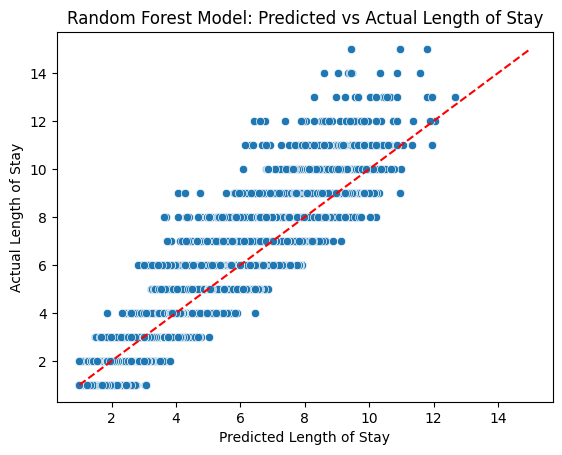

In [47]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_RFmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Random Forest Model: Predicted vs Actual Length of Stay')
plt.show()

In [48]:
#Calculate the relative features importances using permutation_importance
feature_names = X_test.columns
perm_RF = permutation_importance(RF_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

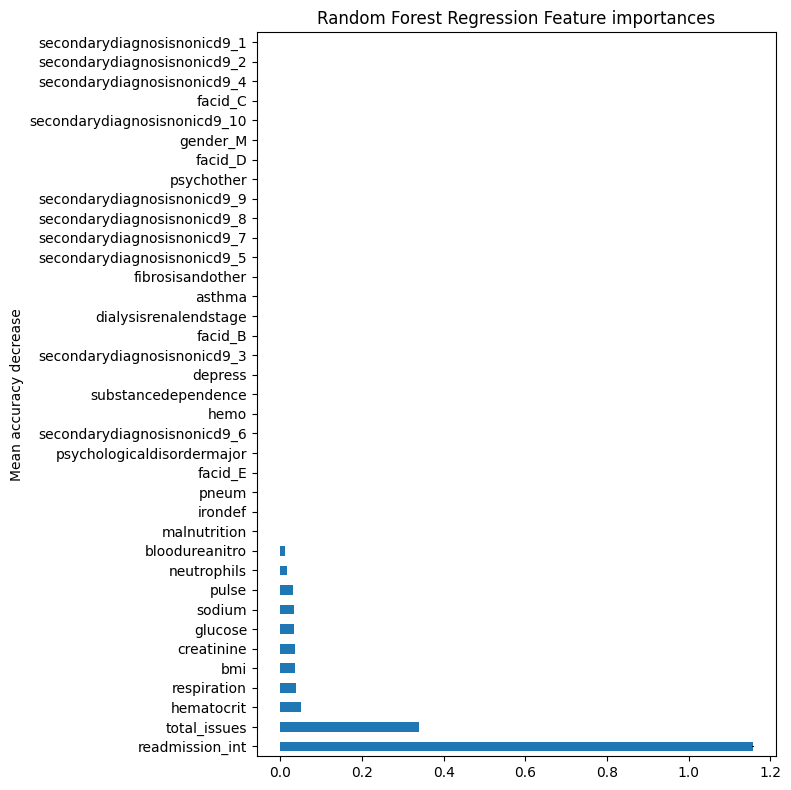

In [49]:
#Transform feature importance data into series for plotting
importances_mean_RF = pd.Series(perm_RF.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_RF = pd.Series(perm_RF.importances_std, index=feature_names).loc[importances_mean_RF.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_RF.plot.barh(yerr=importances_std_RF, ax=ax)
ax.set_title("Random Forest Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Hyperparameter tuning was unable to sufficiently improve the predictions from the Random Forest Regressor learner.  When the predictions were plotted against the y_test actual labels, it appears that parameter tuning tighteded the variance of the predictions but could not address the issue of under estimating the high end of range of admission lengths. 

## XGBoost Regressor

In [50]:
param_grid_XGB = {
    'learning_rate': np.arange(0.01, 1, 0.1),
    'min_child_weight': [10, 25, 50, 75, 100],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1],
    'n_estimators': [200, 250, 300, 350]
}
XGB = XGBRegressor()
XGB_cv = RandomizedSearchCV(estimator=XGB, param_distributions=param_grid_XGB, cv=5, scoring='neg_mean_absolute_error')

XGB_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.8, 0.9,
                                                             1],
                                        'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12],
                                        'min_child_weight': [10, 25, 50, 75,
                                                             100],
                                        'n_estimators': [200, 250, 300, 350]},
                   scoring='neg_mean_absolute_error')

In [51]:
results_XGB = pd.DataFrame(XGB_cv.cv_results_)
top_10_XGB = results_XGB.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_XGB['params'])
top_10_XGB_full = pd.concat([top_10_XGB[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_XGB_full['Mean MAE'] = top_10_XGB_full['mean_test_score']*-1
top_10_XGB_full = top_10_XGB_full.drop('mean_test_score', axis=1)
top_10_XGB_full

rank_test_score  n_estimators  min_child_weight  max_depth  learning_rate  \
0                1           350                50          7           0.11   
1                2           250                75          8           0.31   
2                3           350                50          6           0.11   
3                4           350               100          5           0.11   
4                5           350                75          7           0.41   
5                6           350                10          7           0.41   
6                7           200                75         10           0.51   
7                8           250                75          5           0.91   
8                9           300                75         12           0.01   
9               10           350               100          6           0.01   

   colsample_bytree  Mean MAE  
0               1.0  0.297936  
1               0.7  0.300317  
2               0.9  0.301133  
3               0.5  0.306752  
4               1.0  0.311395  
5               0.9  0.316397  
6               1.0  0.330571  
7               0.5  0.332574  
8               1.0  0.377454  
9               0.8  0.455490

In [52]:
XGB_model = XGBRegressor(n_estimators=350, min_child_weight=50, learning_rate=0.11, colsample_bytree=1.0, max_depth=7)
XGB_model = XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)

In [53]:
y_pred_XGBmodel = XGB_model.predict(X_test)
Rsquared_XGBmodel = XGB_model.score(X_train, y_train)
mea_XGBmodel = mean_absolute_error(y_test, y_pred_XGB)
RMSE_XGBmodel = root_mean_squared_error(y_test, y_pred_XGB)
XGB_model_metrics = {'R-squared': Rsquared_XGBmodel, 'MAE': mea_XGBmodel, 'RMSE':RMSE_XGBmodel}
XGB_model_metrics

{'R-squared': 0.9815956354141235,
 'MAE': 0.29413914680480957,
 'RMSE': 0.3935489356517792}

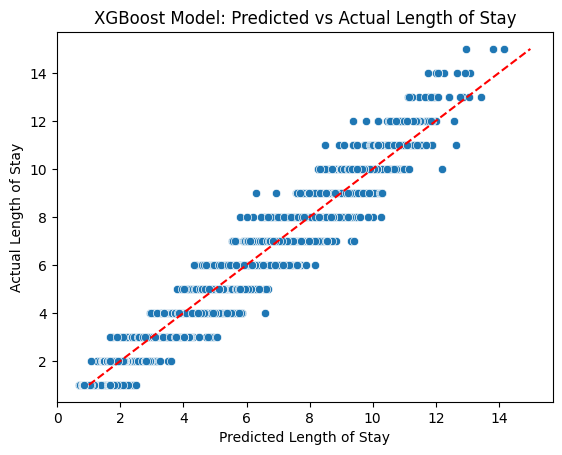

In [54]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_XGBmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('XGBoost Model: Predicted vs Actual Length of Stay')
plt.show()

In [55]:
#Calculate the relative features importances using permutation_importance
feature_names = X_test.columns
perm_XGB = permutation_importance(XGB_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

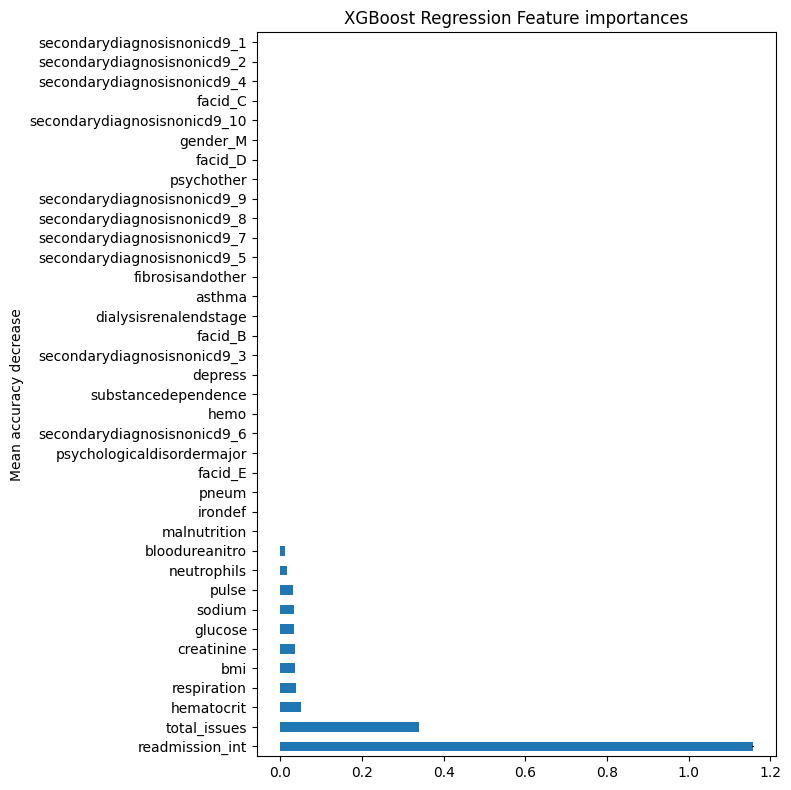

In [56]:
#Transform feature importance data into series for plotting
importances_mean_XGB = pd.Series(perm_XGB.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_XGB = pd.Series(perm_XGB.importances_std, index=feature_names).loc[importances_mean_XGB.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_RF.plot.barh(yerr=importances_std_XGB, ax=ax)
ax.set_title("XGBoost Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## CatBoost Regressor

In [57]:
param_grid_CB = {
    'learning_rate': [.001, .005, .01, .03, .05, .1],
    'depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'iterations': [500, 750, 1000, 1250],
    'l2_leaf_reg': [3, 6, 7, 8, 9, 10],
    'random_strength' : [1, 2, 5, 10]
}
CB = CatBoostRegressor()
CB_cv = RandomizedSearchCV(estimator=CB, param_distributions=param_grid_CB, cv=5, scoring='neg_mean_absolute_error')

CB_cv.fit(X_train, y_train)

0:	learn: 2.3444552	total: 70ms	remaining: 34.9s
1:	learn: 2.3265442	total: 91.9ms	remaining: 22.9s
2:	learn: 2.3092026	total: 117ms	remaining: 19.3s
3:	learn: 2.2915037	total: 140ms	remaining: 17.4s
4:	learn: 2.2748531	total: 164ms	remaining: 16.2s
5:	learn: 2.2583071	total: 208ms	remaining: 17.2s
6:	learn: 2.2421395	total: 238ms	remaining: 16.8s
7:	learn: 2.2252294	total: 270ms	remaining: 16.6s
8:	learn: 2.2083605	total: 292ms	remaining: 15.9s
9:	learn: 2.1923303	total: 324ms	remaining: 15.9s
10:	learn: 2.1762704	total: 359ms	remaining: 16s
11:	learn: 2.1602563	total: 400ms	remaining: 16.3s
12:	learn: 2.1445490	total: 424ms	remaining: 15.9s
13:	learn: 2.1285768	total: 446ms	remaining: 15.5s
14:	learn: 2.1130223	total: 468ms	remaining: 15.1s
15:	learn: 2.0975050	total: 492ms	remaining: 14.9s
16:	learn: 2.0820628	total: 519ms	remaining: 14.7s
17:	learn: 2.0666200	total: 559ms	remaining: 15s
18:	learn: 2.0521490	total: 575ms	remaining: 14.6s
19:	learn: 2.0374584	total: 603ms	remaining: 

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000258423FA140>,
                   param_distributions={'depth': [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                  12],
                                        'iterations': [500, 750, 1000, 1250],
                                        'l2_leaf_reg': [3, 6, 7, 8, 9, 10],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.03, 0.05, 0.1],
                                        'random_strength': [1, 2, 5, 10]},
                   scoring='neg_mean_absolute_error')

In [58]:
results_CB = pd.DataFrame(CB_cv.cv_results_)
top_10_CB = results_CB.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_CB['params'])
top_10_CB_full = pd.concat([top_10_CB[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_CB_full['Mean MAE'] = top_10_CB_full['mean_test_score']*-1
top_10_CB_full = top_10_CB_full.drop('mean_test_score', axis=1)
top_10_CB_full

rank_test_score  random_strength  learning_rate  l2_leaf_reg  iterations  \
0                1                5          0.100            6         750   
1                2                1          0.010            7        1250   
2                3                2          0.030            7         750   
3                4                2          0.010            9         500   
4                5                5          0.005            9        1000   
5                6                1          0.010            8         750   
6                7                1          0.010           10         500   
7                8                5          0.001            6        1000   
8                9                2          0.001            7        1000   
9               10               10          0.001            8        1000   

   depth  Mean MAE  
0     11  0.277306  
1      9  0.289681  
2      7  0.290278  
3      8  0.376988  
4     10  0.396869  
5      4  0.403286  
6      5  0.440251  
7     10  1.017902  
8      5  1.038197  
9      5  1.095920

In [59]:
CB_model = CatBoostRegressor(learning_rate=0.1, random_strength=5, depth = 11, l2_leaf_reg=6, iterations=750)
CB_model = CB_model.fit(X_train, y_train)
y_pred_CBmodel = CB_model.predict(X_test)

0:	learn: 2.1875592	total: 216ms	remaining: 2m 41s
1:	learn: 2.0334198	total: 382ms	remaining: 2m 22s
2:	learn: 1.8978114	total: 600ms	remaining: 2m 29s
3:	learn: 1.7734109	total: 776ms	remaining: 2m 24s
4:	learn: 1.6579393	total: 939ms	remaining: 2m 19s
5:	learn: 1.5629613	total: 1.09s	remaining: 2m 15s
6:	learn: 1.4795706	total: 1.27s	remaining: 2m 15s
7:	learn: 1.3983806	total: 1.42s	remaining: 2m 11s
8:	learn: 1.3269799	total: 1.59s	remaining: 2m 11s
9:	learn: 1.2706053	total: 1.91s	remaining: 2m 21s
10:	learn: 1.2127825	total: 2.08s	remaining: 2m 19s
11:	learn: 1.1625798	total: 2.28s	remaining: 2m 20s
12:	learn: 1.1152172	total: 2.44s	remaining: 2m 18s
13:	learn: 1.0720627	total: 2.62s	remaining: 2m 17s
14:	learn: 1.0334848	total: 2.8s	remaining: 2m 17s
15:	learn: 0.9946991	total: 2.98s	remaining: 2m 16s
16:	learn: 0.9591591	total: 3.12s	remaining: 2m 14s
17:	learn: 0.9263266	total: 3.34s	remaining: 2m 15s
18:	learn: 0.8984300	total: 3.52s	remaining: 2m 15s
19:	learn: 0.8693225	to

In [60]:
Rsquared_CBmodel = CB_model.score(X_train, y_train)
mea_CBmodel = mean_absolute_error(y_test, y_pred_CBmodel)
RMSE_CBmodel = root_mean_squared_error(y_test, y_pred_CBmodel)
CB_model_metrics = {'R-squared': Rsquared_CBmodel, 'MAE': mea_CBmodel, 'RMSE':RMSE_CBmodel}
CB_model_metrics

{'R-squared': np.float64(0.987697012875458),
 'MAE': 0.2738133374310592,
 'RMSE': 0.4013906086999832}

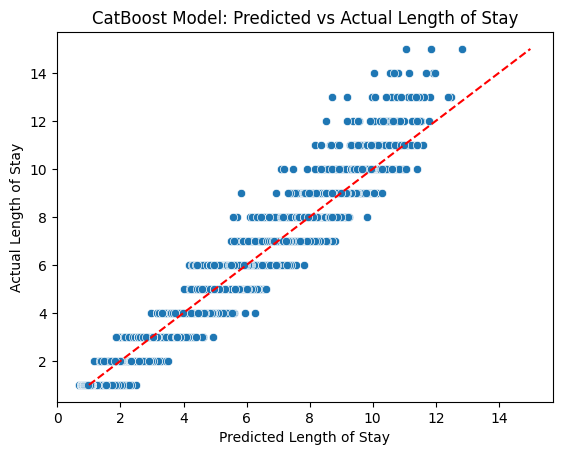

In [61]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CBmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Model: Predicted vs Actual Length of Stay')
plt.show()

In [62]:
#Calculate the relative features importances using permutation_importance
perm_CB = permutation_importance(CB_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

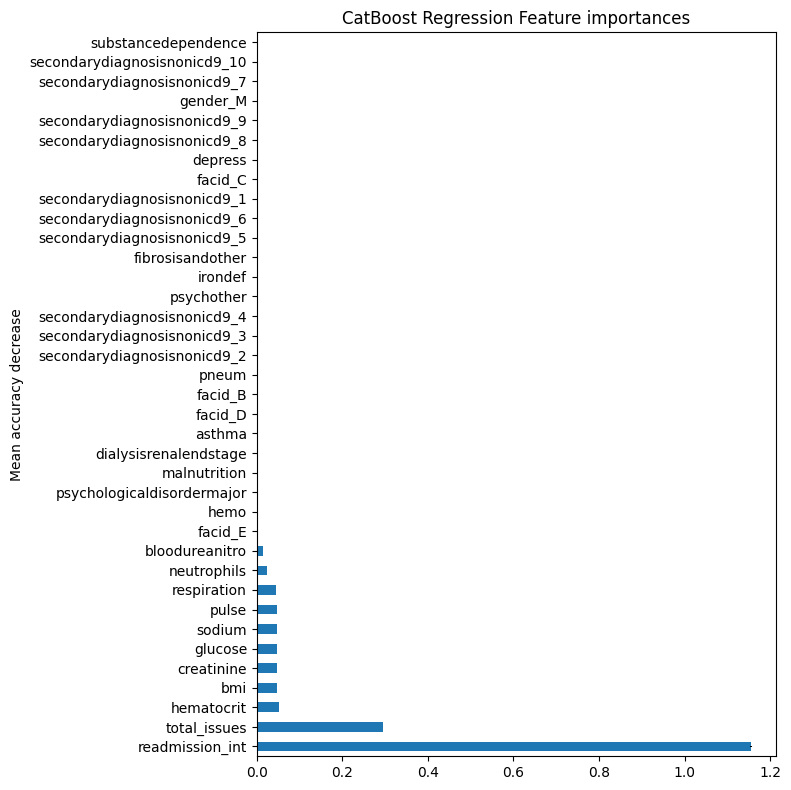

In [63]:
#Transform feature importance data into series for plotting
importances_mean_CB = pd.Series(perm_CB.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_CB = pd.Series(perm_CB.importances_std, index=feature_names).loc[importances_mean_XGB.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_CB.plot.barh(yerr=importances_std_CB, ax=ax)
ax.set_title("CatBoost Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Model Selection

### Summary of Model Building

In [64]:
summary_models = pd.DataFrame({'Random Forest regressor': RF_model_metrics, 'XGBoost Regressor': XGB_model_metrics, 'CatBoost Regressor': CB_model_metrics})
summary_models

Random Forest regressor  XGBoost Regressor  CatBoost Regressor
R-squared                 0.991401           0.981596            0.987697
MAE                       0.333664           0.294139            0.273813
RMSE                      0.576511           0.393549            0.401391

- Random Forest Regressor: Hyperparameter tuning was unable to improve the results of the Random Forest learner for the longer admissions in our test dataset.  This model was the worst of the three and will not be continued.
- XGBoost Regressor: Hyperparameter tuning yeilded modest improvements in R-squared and MAE metrics.  However, this model appeared to be the most accurate for admissions above 10 days.
- CatBoost Regressor: This model had the lowest MAE, both at defalut hyperparameters (MAE=29.4) and after hyperparameter tuning (MAE=28.8).  However, visual inspection of the scatter plot comparing actual to predicted labels for test data suggests that hyperparameter tuning led to underestimation of admissions above 10 days, even as the mean MAE decreased.

All of the gradient boosting based models tested so far have similar MAE and R2, especially for shorter admissions.  In order to better differentiate between these models, I'll look at MAE for stays above and below 10 days, where predictions appear less consistent.

In [65]:
y_test = np.asarray(y_test).ravel()
ytest_lt_10 = y_test < 10
ytest_ge_10 = y_test >= 10

models = ['Random Forest default', 'Random Forest model', 'XGBoost default', 'XGBoost model','CatBoost default', 'CatBoost model']
y_pred_list = [y_pred_RF, y_pred_RFmodel, y_pred_XG, y_pred_XGBmodel, y_pred_CB, y_pred_CBmodel]
MAE_lt_10 = []
MAE_ge_10 = []
for ypred in y_pred_list:
    ypred=np.asarray(ypred).ravel()
    mae_lt_10 = mean_absolute_error(y_test[ytest_lt_10], ypred[ytest_lt_10])
    mae_ge_10 = mean_absolute_error(y_test[ytest_ge_10], ypred[ytest_ge_10])
    MAE_lt_10.append(mae_lt_10)
    MAE_ge_10.append(mae_ge_10)
summary_10 = pd.DataFrame({'MAE < 10 days':MAE_lt_10, 'MAE >= 10 days':MAE_ge_10}, index=models)

In [66]:
summary_10

MAE < 10 days  MAE >= 10 days
Random Forest default       0.313195        1.588853
Random Forest model         0.313195        1.588853
XGBoost default             0.300308        0.678483
XGBoost model               0.288836        0.619327
CatBoost default            0.276551        0.485104
CatBoost model              0.264307        0.856784

These results clearly show that the default CatBoost settings is the learner with the lowest error for admissions of 10 or more days.  Given that these stays are most likely to be important from a business perspective, I recommend using CatBoost with default settings as the final model.

During our model building, we collected data on the features which were most important to each model.  

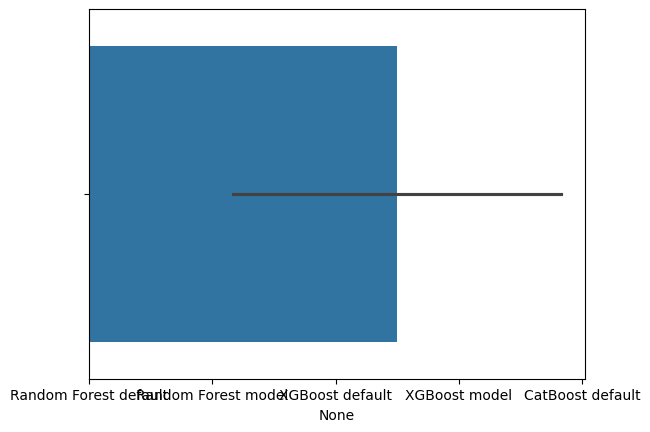

In [118]:
sns.barplot(data=summary_10, x=summary_10.index)
plt.show()

In [74]:
# Loop through features lists of the top 10 t0 t0p 30 features to determine how many features are needed to maintain MAE in the CatBoost learner.
MAE_lt_10 = []
MAE_ge_10 = []
features = range(5, 25)
for i in features:
    X_train_short = X_train[importances_mean_CB.index[:i]]
    X_test_short = X_test[importances_mean_CB.index[:i]]
    CB_short = CatBoostRegressor()
    CB_short.fit(X_train_short, y_train)
    y_pred_CBshort = CB_short.predict(X_test_short)
    y_pred_CBshort=np.asarray(y_pred_CBshort).ravel()
    mae_lt_10 = mean_absolute_error(y_test[ytest_lt_10], y_pred_CBshort[ytest_lt_10])
    mae_ge_10 = mean_absolute_error(y_test[ytest_ge_10], y_pred_CBshort[ytest_ge_10])
    MAE_lt_10.append(mae_lt_10)
    MAE_ge_10.append(mae_ge_10)
summary_10short = pd.DataFrame({'MAE < 10':MAE_lt_10, 'MAE >= 10':MAE_ge_10}, index=features)

Learning rate set to 0.080987
0:	learn: 2.2122870	total: 169ms	remaining: 2m 49s
1:	learn: 2.0783371	total: 286ms	remaining: 2m 22s
2:	learn: 1.9589623	total: 324ms	remaining: 1m 47s
3:	learn: 1.8496739	total: 365ms	remaining: 1m 30s
4:	learn: 1.7517456	total: 399ms	remaining: 1m 19s
5:	learn: 1.6630210	total: 431ms	remaining: 1m 11s
6:	learn: 1.5838650	total: 457ms	remaining: 1m 4s
7:	learn: 1.5124164	total: 495ms	remaining: 1m 1s
8:	learn: 1.4489828	total: 539ms	remaining: 59.4s
9:	learn: 1.3902597	total: 579ms	remaining: 57.3s
10:	learn: 1.3392561	total: 636ms	remaining: 57.2s
11:	learn: 1.2915937	total: 669ms	remaining: 55.1s
12:	learn: 1.2494975	total: 712ms	remaining: 54.1s
13:	learn: 1.2119286	total: 729ms	remaining: 51.4s
14:	learn: 1.1786745	total: 745ms	remaining: 48.9s
15:	learn: 1.1484284	total: 763ms	remaining: 46.9s
16:	learn: 1.1208702	total: 790ms	remaining: 45.7s
17:	learn: 1.0966321	total: 802ms	remaining: 43.8s
18:	learn: 1.0752191	total: 817ms	remaining: 42.2s
19:	l

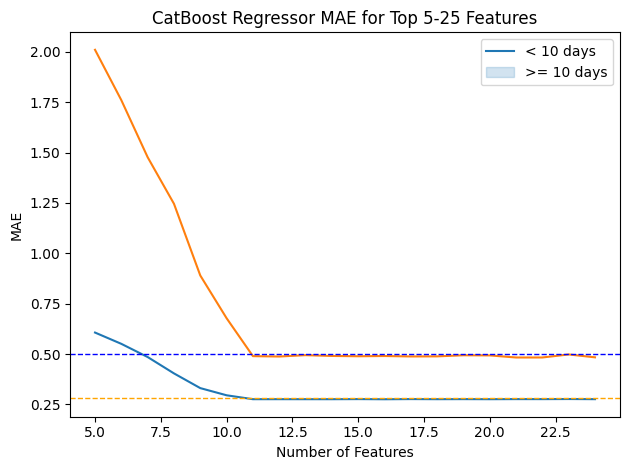

In [75]:
summary_10short = pd.DataFrame({'MAE < 10':MAE_lt_10, 'MAE >= 10':MAE_ge_10}, index=features)
sns.lineplot(data=summary_10short, x=features, y='MAE < 10')
sns.lineplot(data=summary_10short, x=features, y='MAE >= 10')
plt.axhline(y=0.50, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=0.28, color='orange', linestyle='--', linewidth=1)
plt.title('CatBoost Regressor MAE for Top 5-25 Features')
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.legend(["< 10 days", ">= 10 days"], loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
# Print specific MAE value for 11 features
summary_10short.loc[11]

MAE < 10     0.275946
MAE >= 10    0.489660
Name: 11, dtype: float64

In [78]:
# Print specific MAE value for 15 features
summary_10short.loc[15]

MAE < 10     0.276427
MAE >= 10    0.489165
Name: 15, dtype: float64

Based on the above plot, the CatBoostRegressor learner requires the top 20 features to maintain MAE below 0.55 for the admissions of 10 or more days and MAE below 0.3 for admissions below 10 days.  The client could also use the top 15 features if this level of accuracy is not required. In descending order, the top 20 features are as follows:
- Number of Readmissions
- Psychological Disorder (Yes/No)
- Hemotocrit
- BMI
- Glucose
- Creatinine
- Sodium
- Pulse
- Respriation
- Hemo
- Iron Deficiency (Yes/No)
- Substance Dependence (Yes/No)
- Neutrophils
- Depression (Yes/No)
- Blood Urea Nitrogen
- Asthma (Yes/No)
- Dialysis for End-Stage Renal Failure (Yes/No)
- Pneumonia (Yes/No)
- Malnutrition (Yes/No)
- Presence of Other Psychological Symptoms (Yes/No)

## Alternative Model for Unknown Prior Admissions

The model created above relies heavily on the number of prior readmissions in order to predict the length of the current admission.  In practice, this data may not always be available.  The current model could handle making predicitons for patients with other missing data, but might be unable to function accurately for patients with unknown prior admissions. To address this, I will create an alternative CatBoost model for predicting the length of stay for patients with unknown prior admissions and compare it to the current model on X_test where all `readmission_int` values are set to 0.

In [79]:
#Remove readmission_int from training and test data
X_train_alt = X_train.drop('readmission_int', axis=1)
X_test_alt = X_test.drop('readmission_int', axis=1)

# Test default CatBoostRegressor on alternative X_train
CB_alt = CatBoostRegressor()
CB_alt = CB_alt.fit(X_train_alt, y_train)
y_pred_CBalt = CB_alt.predict(X_test)

Learning rate set to 0.080987
0:	learn: 2.3127986	total: 38.2ms	remaining: 38.2s
1:	learn: 2.2697820	total: 66.1ms	remaining: 33s
2:	learn: 2.2339032	total: 93.8ms	remaining: 31.2s
3:	learn: 2.2005694	total: 117ms	remaining: 29.2s
4:	learn: 2.1711417	total: 136ms	remaining: 27.1s
5:	learn: 2.1464642	total: 167ms	remaining: 27.6s
6:	learn: 2.1236406	total: 200ms	remaining: 28.4s
7:	learn: 2.1029468	total: 256ms	remaining: 31.7s
8:	learn: 2.0844891	total: 284ms	remaining: 31.3s
9:	learn: 2.0683900	total: 302ms	remaining: 29.9s
10:	learn: 2.0538763	total: 320ms	remaining: 28.8s
11:	learn: 2.0403984	total: 338ms	remaining: 27.9s
12:	learn: 2.0288060	total: 359ms	remaining: 27.3s
13:	learn: 2.0177364	total: 382ms	remaining: 26.9s
14:	learn: 2.0071877	total: 409ms	remaining: 26.8s
15:	learn: 1.9981268	total: 436ms	remaining: 26.8s
16:	learn: 1.9902518	total: 465ms	remaining: 26.9s
17:	learn: 1.9824970	total: 486ms	remaining: 26.5s
18:	learn: 1.9754123	total: 504ms	remaining: 26s
19:	learn: 1

In [115]:
#Collect metrics on default model
Rsquared_CBalt = CB_alt.score(X_train_alt, y_train)
mea_CBalt = mean_absolute_error(y_test, y_pred_CBalt)
RMSE_CBalt = root_mean_squared_error(y_test, y_pred_CBalt)
CB_alt_metrics = {'R-squared': Rsquared_CBalt, 'MAE': mea_CBalt, 'RMSE':RMSE_CBalt}
CB_alt_metrics

{'R-squared': np.float64(0.44980845665691027),
 'MAE': 1.530303359401007,
 'RMSE': 1.8476219929774909}

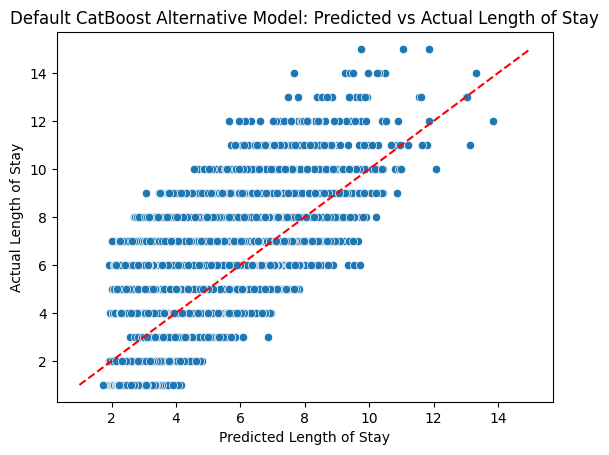

In [116]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CBalt, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Default CatBoost Alternative Model: Predicted vs Actual Length of Stay')
plt.show()

In [117]:
#Perform hyperparameter search on alternative CatBoost model to improve MAE
param_grid_CBalt = {
    'learning_rate': [.001, .005, .01, .03, .05, .1],
    'depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'iterations': [500, 750, 1000, 1250],
    'l2_leaf_reg': [3, 6, 7, 8, 9, 10],
    'random_strength' : [1, 2, 5, 10]
}
CB_model_alt = CatBoostRegressor()
CB_model_alt = RandomizedSearchCV(estimator=CB_model_alt, param_distributions=param_grid_CBalt, cv=5, scoring='neg_mean_absolute_error')

CB_model_alt.fit(X_train_alt, y_train)

0:	learn: 2.3596655	total: 26.2ms	remaining: 19.6s
1:	learn: 2.3568405	total: 73.6ms	remaining: 27.5s
2:	learn: 2.3541349	total: 116ms	remaining: 28.8s
3:	learn: 2.3512128	total: 136ms	remaining: 25.3s
4:	learn: 2.3483203	total: 159ms	remaining: 23.7s
5:	learn: 2.3456035	total: 179ms	remaining: 22.2s
6:	learn: 2.3428758	total: 194ms	remaining: 20.6s
7:	learn: 2.3401895	total: 211ms	remaining: 19.6s
8:	learn: 2.3374167	total: 229ms	remaining: 18.8s
9:	learn: 2.3347980	total: 247ms	remaining: 18.3s
10:	learn: 2.3323041	total: 288ms	remaining: 19.4s
11:	learn: 2.3295914	total: 318ms	remaining: 19.6s
12:	learn: 2.3270384	total: 358ms	remaining: 20.3s
13:	learn: 2.3245102	total: 374ms	remaining: 19.7s
14:	learn: 2.3220062	total: 389ms	remaining: 19.1s
15:	learn: 2.3194843	total: 401ms	remaining: 18.4s
16:	learn: 2.3169978	total: 423ms	remaining: 18.2s
17:	learn: 2.3144459	total: 437ms	remaining: 17.8s
18:	learn: 2.3118738	total: 448ms	remaining: 17.2s
19:	learn: 2.3094223	total: 461ms	remai

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000025866DCB430>,
                   param_distributions={'depth': [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                  12],
                                        'iterations': [500, 750, 1000, 1250],
                                        'l2_leaf_reg': [3, 6, 7, 8, 9, 10],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.03, 0.05, 0.1],
                                        'random_strength': [1, 2, 5, 10]},
                   scoring='neg_mean_absolute_error')

In [119]:
results_CBalt = pd.DataFrame(CB_model_alt.cv_results_)
top_10_CBalt = results_CBalt.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_CBalt['params'])
top_10_CBalt_full = pd.concat([top_10_CBalt[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_CBalt_full['Mean MAE'] = top_10_CBalt_full['mean_test_score']*-1
top_10_CBalt_full = top_10_CBalt_full.drop('mean_test_score', axis=1)
top_10_CBalt_full

rank_test_score  random_strength  learning_rate  l2_leaf_reg  iterations  \
0                1                1          0.050           10        1250   
1                2                2          0.100           10        1000   
2                3               10          0.010            6        1000   
3                4                2          0.005            6         750   
4                5                2          0.005            9         750   
5                6                5          0.010            3         500   
6                7                2          0.005           10         500   
7                8                1          0.005            8         500   
8                9               10          0.005            3         750   
9               10                1          0.001            9        1250   

   depth  Mean MAE  
0      8  1.534317  
1     10  1.549069  
2     10  1.562406  
3      6  1.577715  
4      6  1.578709  
5      5  1.588820  
6      8  1.596181  
7      6  1.601826  
8     11  1.601877  
9      4  1.703318

In [121]:
#Train alternative model with tuned hyperparameters
CB_alt_model = CatBoostRegressor(learning_rate=.05, l2_leaf_reg=10, iterations=1250, depth=8)
CB_alt_model = CB_alt_model.fit(X_train_alt, y_train)
y_pred_CBalt_model = CB_alt_model.predict(X_test)

0:	learn: 2.3295602	total: 148ms	remaining: 3m 4s
1:	learn: 2.3010921	total: 299ms	remaining: 3m 6s
2:	learn: 2.2758165	total: 812ms	remaining: 5m 37s
3:	learn: 2.2508454	total: 1.18s	remaining: 6m 7s
4:	learn: 2.2282454	total: 1.57s	remaining: 6m 30s
5:	learn: 2.2071590	total: 1.7s	remaining: 5m 51s
6:	learn: 2.1874890	total: 1.78s	remaining: 5m 15s
7:	learn: 2.1693948	total: 1.91s	remaining: 4m 56s
8:	learn: 2.1520056	total: 2.01s	remaining: 4m 37s
9:	learn: 2.1353975	total: 2.13s	remaining: 4m 23s
10:	learn: 2.1203728	total: 2.23s	remaining: 4m 10s
11:	learn: 2.1065337	total: 2.41s	remaining: 4m 8s
12:	learn: 2.0939986	total: 2.65s	remaining: 4m 12s
13:	learn: 2.0815954	total: 2.95s	remaining: 4m 20s
14:	learn: 2.0703379	total: 3.1s	remaining: 4m 15s
15:	learn: 2.0595736	total: 3.34s	remaining: 4m 17s
16:	learn: 2.0492013	total: 3.62s	remaining: 4m 22s
17:	learn: 2.0396988	total: 3.91s	remaining: 4m 27s
18:	learn: 2.0307995	total: 4.07s	remaining: 4m 23s
19:	learn: 2.0225460	total: 

In [122]:
Rsquared_CBalt_model = CB_alt_model.score(X_train_alt, y_train)
mea_CBalt_model = mean_absolute_error(y_test, y_pred_CBalt_model)
RMSE_CBalt_model = root_mean_squared_error(y_test, y_pred_CBalt_model)
CB_alt_metrics_model = {'R-squared': Rsquared_CBalt_model, 'MAE': mea_CBalt_model, 'RMSE':RMSE_CBalt_model}
CB_alt_metrics_model

{'R-squared': np.float64(0.4690588105496081),
 'MAE': 1.5323476355380434,
 'RMSE': 1.851162564705077}

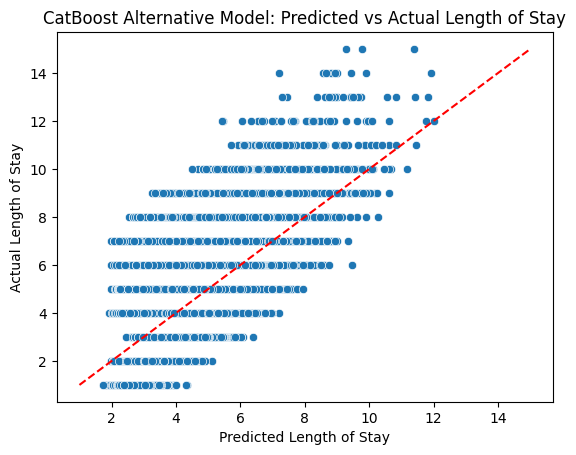

In [123]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CBalt_model, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Alternative Model: Predicted vs Actual Length of Stay')
plt.show()

In [124]:
#Calculate the relative features importances using permutation_importance
perm_CB_model = permutation_importance(CB_alt_model, X_test_alt, y_test, n_repeats=10, random_state=42, n_jobs=2)

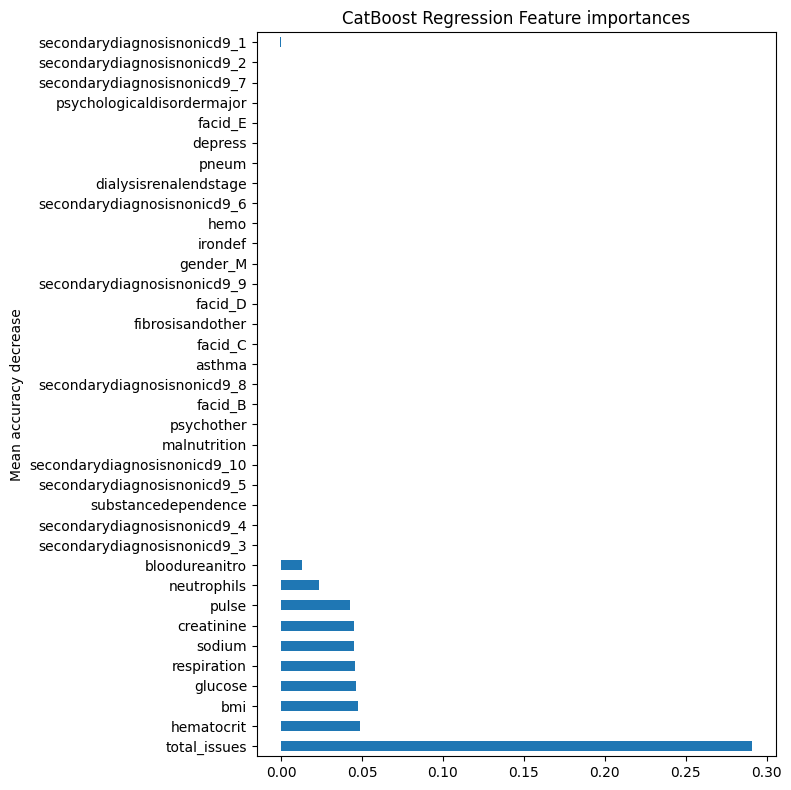

In [125]:
#Transform feature importance data into series for plotting
feature_names_alt = X_test_alt.columns
importances_mean_CB = pd.Series(perm_CB_model.importances_mean, index=feature_names_alt).sort_values(ascending=False)
importances_std_CB = pd.Series(perm_CB_model.importances_std, index=feature_names_alt).loc[importances_mean_CB.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_CB.plot.barh(yerr=importances_std_CB, ax=ax)
ax.set_title("CatBoost Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

For this alternative model, the MAE was predictably much higher and could not be brought below 1.5 days.  Due to this unavoidable error, we would not recommend removing any of the features from this model, as was possible for the primary model which included the readmission number.  

Below, I will compare the alterative model to the primary model when readmission number is unavailable and has been set to 0 as a default.

In [126]:
X_test_0 = X_test.copy()
X_test_0['readmission_int'] = 0

In [127]:
#Determine MAE with test data where readmission_int has been set to 0
y_pred_CB = np.array(CB.predict(X_test_0))
mae_CB = mean_absolute_error(y_test, y_pred_CB)
print(f'CatBoost Regressor MAE: {mae_CB}')

CatBoost Regressor MAE: 1.4313778411529916


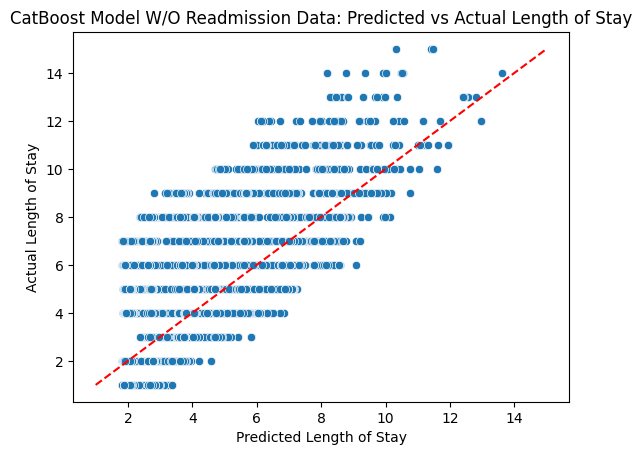

In [128]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CB, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Model W/O Readmission Data: Predicted vs Actual Length of Stay')
plt.show()

Even without the number of readmissions, the CatBoost learner that was able to train on the full X_train performs better than the alternative learner, with an MAE of 1.43.  This shows that the alternative model cannot be justified.

# Summary

This notebook describes how a model was built to predict the length of ICU admssions from the dataset `LengthOfStay.csv`.  This was acheived through the following steps:
1. Testing seven regression learners with default hyperparatmeters 
    - Learners were evaluated by MAE and R-squared, as well the subjective tendency to maintain accuracy for predicting admission over 10 days
    - CatBoost Regressor was the top candidate and was selected along with XGBoost and Random Forest
2. Hyperparameter tuning and model building for the top three learners
    - Hyperparatmeter tuning was done with RandomSearchCV over a purposefully broad range of values and parameters for each model, making sure that default value were included with the hyperparatmeter space
    - Hyperparameter tuning yielded modest improvements in MAE for all models, but had the side-effect of increasing MAE for longer stays at the expense of MAE over the entire testing dataset
    - CatBoost Regressor with default hyperparameters was the learner with the lower MAE for admissions of 10 or more days of all the learners tested
3. CatBoost Regressor with default settings was selected for the final model
    - To optimize efficiency, this model can be limited to the top 20 features without increasing the error
    - This model can operate with the top 15 features if desired with modest increases in error
    - An alternative model wihtout the `reamission_int` was tested to determine if this was necessary to make predictions for patients with an unknown number of readmissions.  However, the initial model trained with the complete data set still performed better with a lower MAE when `readmission_int` was set to 0 in the test data.

In [129]:
#save final model
CB.save_model("CatBoostRegressor_LoS_model.cbm")

In [134]:
# Define shorted training data sets
X_train_11 = X_train[importances_mean_CB.index[:11]]
X_test_11 = X_test[importances_mean_CB.index[:11]]


In [135]:
# save the data to a new csv file
datapath = 'C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2'
save_file(X_train_11, 'LengthOfStay_Xtrain_11.csv', datapath)
save_file(X_test_11, 'LengthOfStay_Xtest_11.csv', datapath)



Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtrain_11.csv"
Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtest_11.csv"
